In [ ]:
from models import preflop_model

model = preflop_model()
model.summary()



In [ ]:
from pushfold import PushFoldEmulator

import numpy as np

emul = PushFoldEmulator(200,10)
num_hands = 100000
total_reward = 0

e = 0.10
loss = []

sb_pushed_plt = []
bb_called_plt = []

state_sb = np.zeros((16))
state_bb = np.zeros((16))

targetQ = np.zeros((2))

bankroll_sb = [0]
bankroll_player1 = [0]
player1 = True

replay_state = []
replay_Q = []
max_replay = 10000

sb_pushed = 0
bb_called = 0


for i in range(num_hands):
    reward_sb = 0
    reward_bb = 0

  
    emul.new_hand(np.random.randint(80,400))

    emul.get_hand_feature()

    sb_features = np.concatenate([emul.players_cards[1],np.array([emul.suited[0],1,emul.starting_stack/400])]).reshape((1,16))
    bb_features = np.concatenate([emul.players_cards[0],np.array([emul.suited[1],0,emul.starting_stack/400])]).reshape((1,16))
    
    replay_state.append(sb_features.reshape((16,)))
    
    
    #run model to choose action
    allQ_sb = model.predict(sb_features)
    action_sb = np.argmax(allQ_sb)
    allQ_bb = model.predict(bb_features)
    action_bb = np.argmax(allQ_bb)

    #randomly discover new line
    if(np.random.rand(1) < e):

        action_sb = np.random.randint(0,2)
        action_bb = np.random.randint(0,2)
        
    emul.play_action(action_sb)
    if action_sb == 1:
        sb_pushed +=1
    
    if emul.is_round_finished() == False:
        emul.play_action(action_bb)     
        if action_sb == 1:
            if action_bb == 1:
                bb_called +=1
            

    r  = emul.get_sb_reward()
    total_reward +=r
    bankroll_sb.append(bankroll_sb[-1]+r)
    
    allQ_sb[0,action_sb] = r
    replay_Q.append(allQ_sb.reshape((2,)))
    
    #train only if sb played. otherwise positive reward for folding
    if action_sb == 1:
        replay_state.append(bb_features.reshape((16,)))
        allQ_bb[0,action_bb] = -r
        replay_Q.append(allQ_bb.reshape((2,)))
    

    if player1 == True:
        player1 = False
        bankroll_player1.append(bankroll_player1[-1]+r)
    else:
        player1 = True
        bankroll_player1.append(bankroll_player1[-1]-r)

    if(i%2000== 0 and i > 0):
        sb_pushed_pct = int(sb_pushed/(i+1)*100)
        sb_pushed_plt.append(sb_pushed_pct)
        bb_called_pct = int(bb_called/(sb_pushed+1)*100)
        bb_called_plt.append(bb_called_pct)
        print('\n\nround',i)
        print('Won(SB):',r,'  Total won (SB):',total_reward)
        print('SB pushed ' + str(sb_pushed_pct)+'% , BB called '+  str(bb_called_pct)+'%' )
        print('sb_features')
        print(sb_features)
        print('allQ_sb:')
        print(allQ_sb)
        print('\nbb_features')
        print(bb_features)
        print('allQ_bb:')   
        print(allQ_bb)
        
        print(emul.get_action_histories_text(hole_cards = True))
        
        #print(emul.events)
        
        model.fit(np.stack(replay_state),np.stack(replay_Q),verbose=1)


    if(len(replay_state) > max_replay):
        replay_state = replay_state[50:]
        replay_Q = replay_Q[50:]




round 2000
Won(SB): 351   Total won (SB): 2864
SB pushed 47% , BB called 40%
sb_features
[[ 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
   1.      0.      1.      0.      1.      0.8775]]
allQ_sb:
[[  -9.86704731  351.        ]]

bb_features
[[ 0.      0.      0.      0.      0.      0.      0.      1.      0.      0.
   0.      0.      1.      0.      0.      0.8775]]
allQ_bb:
[[  -9.64992428 -351.        ]]
{'bb_player': ['D9', 'CA'], 'sb_player': ['HA', 'DQ']}
preflop
sb_player SMALLBLIND 10
bb_player BIGBLIND 20
sb_player raises to 351
bb_player CALL 351

Epoch 1/1
2945/2945 [==============================] - 1s 269us/step - loss: 8268.1452


round 4000
Won(SB): -10   Total won (SB): -1613
SB pushed 43% , BB called 36%
sb_features
[[ 1.      0.      0.      0.      0.      0.      0.      0.      0.      0.
   1.      0.      0.      0.      1.      0.5525]]
allQ_sb:
[[-10.         -24.73308372]]

bb_features
[[ 1.      0.      0.      0.      0.   

9992/9992 [==============================] - 3s 254us/step - loss: 4930.0726


round 28000
Won(SB): -10   Total won (SB): -70742
SB pushed 37% , BB called 31%
sb_features
[[ 0.      0.      0.      1.      0.      0.      0.      0.      0.      0.
   0.      1.      0.      0.      1.      0.2575]]
allQ_sb:
[[-10.         -11.55766106]]

bb_features
[[ 1.      0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      1.      1.      0.      0.2575]]
allQ_bb:
[[-15.05026627 -21.29601669]]
{'bb_player': ['DA', 'C2'], 'sb_player': ['D5', 'DK']}
preflop
sb_player SMALLBLIND 10
bb_player BIGBLIND 20
sb_player folds

Epoch 1/1
9955/9955 [==============================] - 3s 253us/step - loss: 4681.2196


round 30000
Won(SB): 20   Total won (SB): -74321
SB pushed 37% , BB called 31%
sb_features
[[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     1.
   0.     1.     0.     1.     0.235]]
allQ_sb:
[[ -9.11332989  20.        ]]

bb_features
[[ 0.

9974/9974 [==============================] - 3s 261us/step - loss: 4172.2020


round 54000
Won(SB): -10   Total won (SB): -94903
SB pushed 39% , BB called 29%
sb_features
[[ 0.      0.      0.      1.      0.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      1.      0.8575]]
allQ_sb:
[[-10.         -23.02308083]]

bb_features
[[ 0.      1.      0.      0.      0.      0.      0.      0.      1.      0.
   0.      0.      0.      0.      0.      0.8575]]
allQ_bb:
[[-19.11422348 -38.87891769]]
{'bb_player': ['CT', 'D3'], 'sb_player': ['D5', 'S9']}
preflop
sb_player SMALLBLIND 10
bb_player BIGBLIND 20
sb_player folds

Epoch 1/1
9978/9978 [==============================] - 3s 255us/step - loss: 4816.1593


round 56000
Won(SB): 20   Total won (SB): -104032
SB pushed 40% , BB called 29%
sb_features
[[ 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      1.      1.      1.      1.      0.8625]]
allQ_sb:
[[-14.07470703  20.        ]]

b

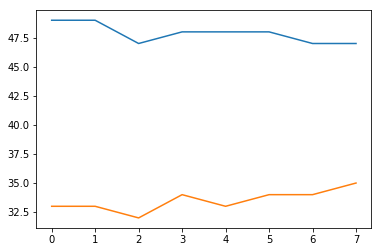

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(sb_pushed_plt[1:])
plt.plot(bb_called_plt[1:])

In [5]:
from metrics import compute_nash_pusher

compute_nash_pusher(model)

[[ 20.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [  0.   20.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [  0.    0.   20.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [  0.    0.    0.   20.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [  0.    0.    0.    0.   20.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [  0.    0.    0.    0.    0.   20.    0.    0.    0.    0.    0.    0.
    0. ]
 [  0.    0.    0.    0.    0.    0.   20.    0.    0.    0.    0.    0.
    0. ]
 [  0.    0.    0.    0.    0.    0.    0.   20.    0.    0.    0.    0.
    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    4.5   0.    0.    0.
    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    2.4   0.    0.
    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   20.    0.
    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   20.
    0. ]
 [  0.    0.    

In [ ]:
from models import save_model

save_model(model,'pushfold')

In [1]:
from models import load

model = load('pushfold')

Using TensorFlow backend.
